<h2 align='center'> ANZ Virtual Program </h2>

### Background information of both tasks: 
This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.


<hr>

<h2 align='center'> TASK1: EXPLORATORY DATA ANALYSIS </h2>

Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

### Task : 
- Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)
- Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?
- Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?
- Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

<hr>

- Link to the internship: https://in.insidesherpa.com/virtual-internships/ZLJCsrpkHo9pZBJNY

<hr>

#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [2]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Inspecting Data

In [3]:
df.shape

(12043, 23)

- Dataset comprises 12,043 observations(rows) and 23 features(columns).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

- Dataset has 4 Float columns, 1 integer columns and 17 object (string) Columns
- Dataset has  null values as all the columns don't have 12043 observations

In [5]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

### Statistical Summary :
- Get the insight of data using describe: 

In [6]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


- The attributes balance, age, amount have very huge difference in their 75% and maximum value, ie it confirms the presence of outliers in the data
- We have very large difference in the mean and median of balance and amount, ie mean is shifted because of presence of outliers in the column

By observation, we can say that we have many outliers in the dataset

Transactional Analysis 

- The average transaction amount is 187.93 
- Maximum amount transaction is 8835.98
- Minimum amount transaction is 0.1

### Exploratory Data Analysis

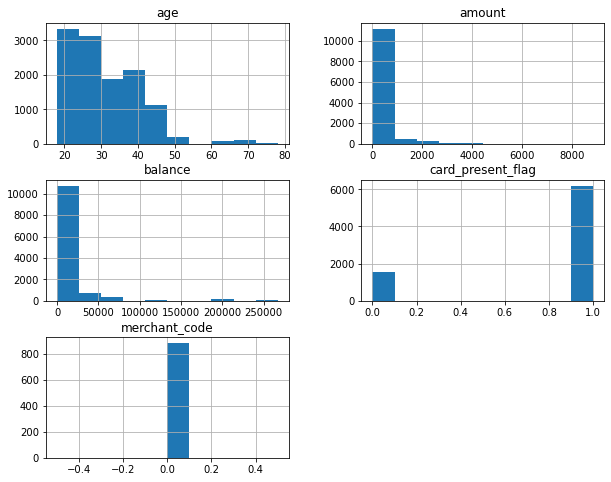

In [8]:
df.hist(figsize=(10,8));

- age, amount, balance are positevely skewed ie, shifted towards left
- card_present flag is binary categorical ie, having 0's and 1's. There is majortiy of observations in 1's
- merchant code seems to have only one value 

In [9]:
# creating copy of original data 
eda = df.copy()

# spliting date to year, month, weekdays seperately: 
eda['year'] = df['date'].dt.year
eda['month'] = df['date'].dt.month
eda['weekday'] = df['date'].dt.weekday

In [10]:
eda.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,year,month,weekday
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018,8,2
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018,8,2


In [11]:
eda['year'].value_counts()

2018    12043
Name: year, dtype: int64

- The data is only of year 2018 

In [12]:
eda['month'].value_counts()

10    4087
9     4013
8     3943
Name: month, dtype: int64

- 10 (ie, October) has maximum observations
- 8 (ie, August) has least observations

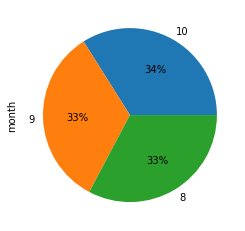

In [13]:
eda['month'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [14]:
eda['weekday'].value_counts()

4    2073
2    2063
3    1801
5    1709
6    1550
1    1487
0    1360
Name: weekday, dtype: int64

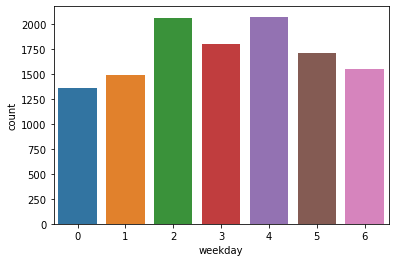

In [15]:
sns.countplot(x='weekday', data=eda)

0 - Monday, 1- Tueday and so on...

- Wednesday and Friday has maximum number of counts 

### Transaction Analysis on Monthly basis

In [16]:
df_aug = eda[eda['month'] == 8]
print("FOR MONTH AUGUST: ")
print("Average amount: ", df_aug['amount'].mean())
print("Maximum amount: ", df_aug['amount'].max())
print("Mininmum amount: ", df_aug['amount'].min())

FOR MONTH AUGUST: 
Average amount:  185.12186659903654
Maximum amount:  8835.98
Mininmum amount:  1.52


In [17]:
df_sep = eda[eda['month'] == 9]
print("FOR MONTH SEPTEMBER: ")
print("Average amount: ", df_sep['amount'].mean())
print("Maximum amount: ", df_sep['amount'].max())
print("Mininmum amount: ", df_sep['amount'].min())

FOR MONTH SEPTEMBER: 
Average amount:  182.04590331422853
Maximum amount:  8835.98
Mininmum amount:  0.1


In [18]:
df_oct = eda[eda['month'] == 10]
print("FOR MONTH OCTOBER: ")
print("Average amount: ", df_oct['amount'].mean())
print("Maximum amount: ", df_oct['amount'].max())
print("Mininmum amount: ", df_oct['amount'].min())

FOR MONTH OCTOBER: 
Average amount:  196.42732321996542
Maximum amount:  8835.98
Mininmum amount:  0.1


### Transactional Analysis : 

FOR MONTH AUGUST: 
- Average amount:  185.12186659903654
- Maximum amount:  8835.98
- Mininmum amount:  1.52

<hr> 

FOR MONTH SEPTEMBER: 
- Average amount:  182.04590331422853
- Maximum amount:  8835.98
- Mininmum amount:  0.1

<hr> 

FOR MONTH OCTOBER: 
- Average amount:  196.42732321996542
- Maximum amount:  8835.98
- Mininmum amount:  0.1

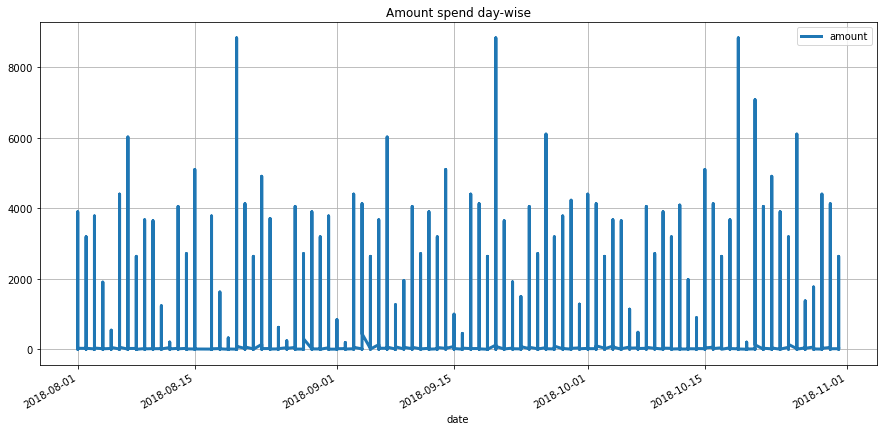

In [19]:
eda.plot(x ='date', y='amount', figsize = (15,7), linewidth = 3, title = 'Amount spend day-wise')
plt.grid()
plt.show()

- On DAY- 19 of every month, there is maximum amount transactions ( ie, 8000+ )


### Let's analyse data seperately 

In [20]:
df_month = eda.groupby(['month']).sum()
df_month['month'] = df_month.index
df_month

,card_present_flag,merchant_code,balance,age,amount,year,weekday,month
month,,,,,,,,
8,2041.0,0.0,42561328.01,120194,729935.52,7956974,12081,8
9,2079.0,0.0,59112096.51,122531,730550.21,8098234,12930,9
10,2074.0,0.0,75409202.53,125578,802798.47,8247566,12142,10


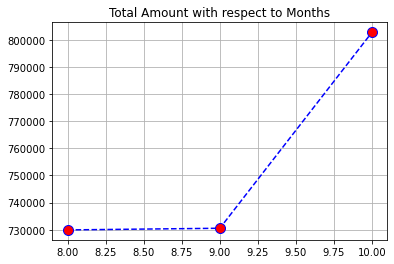

In [21]:
plt.plot(df_month['month'], df_month['amount'], 
         color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Amount with respect to Months')
plt.grid()
plt.show()

- On month of october we have maximum number of amount transactions

In [22]:
df_week = eda.groupby(['weekday']).sum()
df_week['weekday'] = df_week.index
df_week

,card_present_flag,merchant_code,balance,age,amount,year,month,weekday
weekday,,,,,,,,
0,588.0,0.0,20963686.04,40698,507580.56,2744480,12353,0
1,679.0,0.0,21958171.17,46081,329484.19,3000766,13430,1
2,1017.0,0.0,28022116.46,61864,402729.72,4163134,18613,2
3,901.0,0.0,30399629.28,57037,331402.77,3634418,16207,3
4,1058.0,0.0,28336334.86,64016,516909.84,4183314,18505,4
5,1059.0,0.0,26263096.84,52644,93002.56,3448762,15397,5
6,892.0,0.0,21139592.40,45963,82174.56,3127900,14026,6


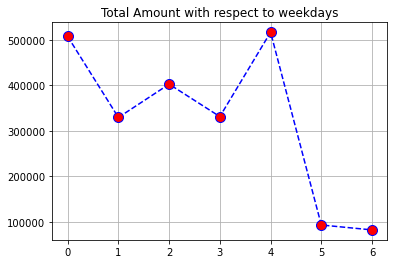

In [23]:
plt.plot(df_week['weekday'], df_week['amount'], 
         color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Amount with respect to weekdays')
plt.grid()
plt.show()

- Monday and Friday has maximum number of transactions

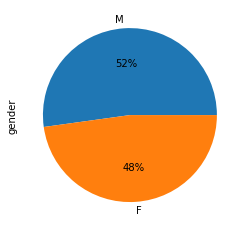

In [24]:
eda['gender'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

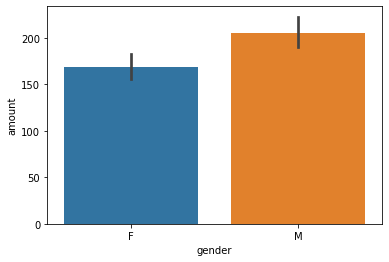

In [25]:
sns.barplot(x='gender', y='amount', data=eda)

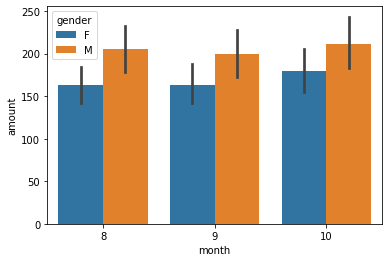

In [26]:
sns.barplot(x='month', y='amount', hue='gender', data=eda)

- Males spend more money than females

In [27]:
eda['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

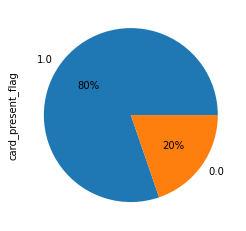

In [28]:
eda['card_present_flag'].value_counts().plot(kind='pie', autopct="%1.0f%%")

- 80% of users uses card payment

In [29]:
eda['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

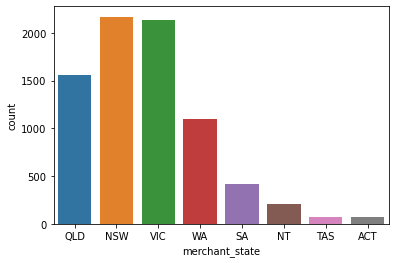

In [30]:
sns.countplot(x='merchant_state', data=eda)

- NSW & VIC states has most of the observations

In [31]:
eda['merchant_state_encode'] = eda['merchant_state'].map({'NSW':0, 'VIC': 1, 'QLD': 2, 'WA': 3, 'SA': 4,
                                                                    'NT': 5, 'TAS': 6, 'ACT': 7})
                                                           
eda['merchant_state_encode'].head()

0    2.0
1    0.0
2    0.0
3    2.0
4    2.0
Name: merchant_state_encode, dtype: float64

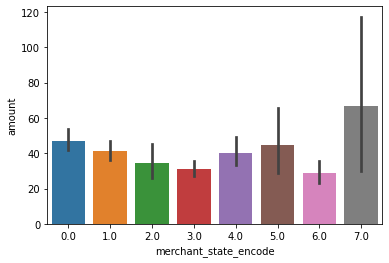

In [32]:
sns.barplot(x='merchant_state_encode', y='amount', data=eda)

- ACT state has maximum number of transactions

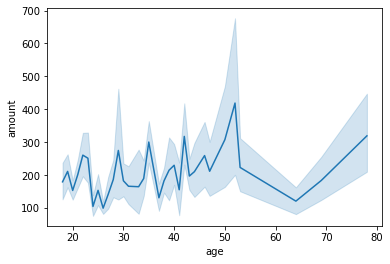

In [33]:
sns.lineplot(x='age', y='amount', data=eda)

- Customers with age near around 50 had done most of the transactions

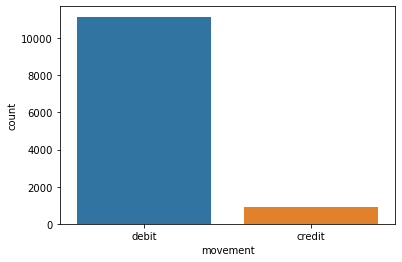

In [34]:
sns.countplot(x='movement', data=eda)

- around 90% of person uses debit card 

In [35]:
eda['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

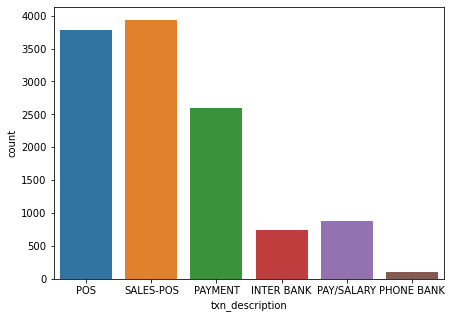

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(x='txn_description', data=eda)

- Sales-Pos has maximum number of count 
- Phone-bank has minimum number of count

In [37]:
eda['txn_encoded'] = eda['txn_description'].map({'SALES-POS': 0, 'POS': 1, 'PAYMENT': 2, 'PAY/SALARY': 3, 'INTER BANK': 4, 
                                                 'PHONE BANK': 5  })
                                                           
eda['txn_encoded'].head()

0    1
1    0
2    1
3    0
4    0
Name: txn_encoded, dtype: int64

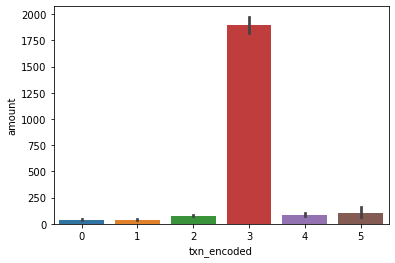

In [38]:
sns.barplot(x='txn_encoded', y='amount', data=eda)

- Pay/Salary has maximum number of amount transactions

### Correlational Matrix

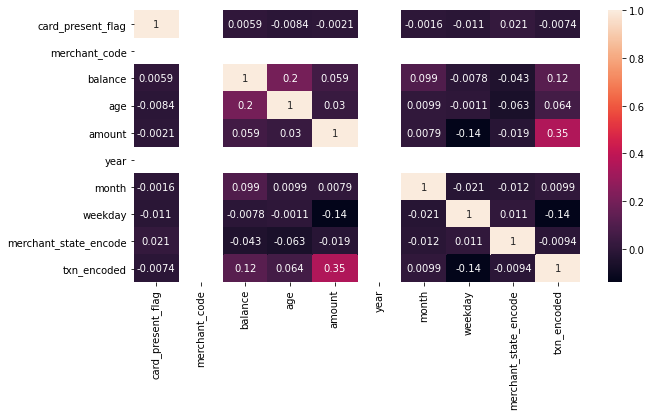

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(eda.corr(), annot=True)

- Merchent code and year have no impact on data 
- Attribute amount has moderate positive correlation with txn_encoded
- Rest all the attributes seems to have very least correlation with each other

<hr>

<h2 align='center'> TASK2: PREDICTIVE ANALYSIS </h2>
Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings

### Task
- For this task, you’ll likely need to use statistical software such as R, SAS, or Python.
- Using the same transaction dataset, identify the annual salary for each customer
- Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.
- Build a simple regression model to predict the annual salary for each customer using the attributes you identified above
- How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [40]:
df.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


In [41]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [42]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

- As in EDA we come to know most of the customers have done transaction for pay/salary

In [43]:
datasal = df[df['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [44]:
# taking mean of amount of transactions a persons had done in past : 
j =[]
for customer_id in df['customer_id']:
    j.append(int(datasal.loc[customer_id]['amount'].mean()))
df['annual_salary'] = j

### Analysis of salary with other variables

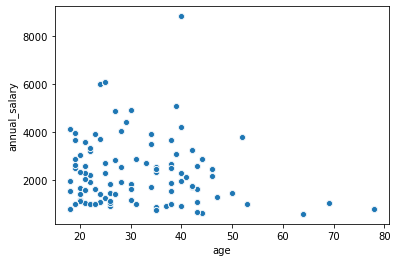

In [45]:
sns.scatterplot(x='age', y='annual_salary', data=df)

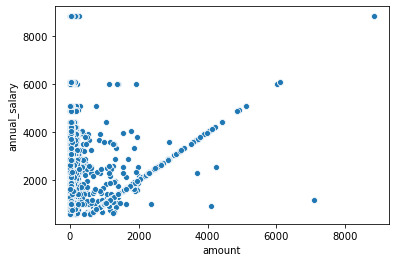

In [46]:
sns.scatterplot(x='amount', y='annual_salary', data=df)

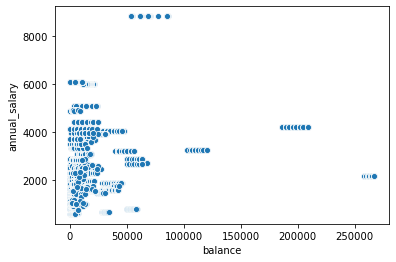

In [47]:
sns.scatterplot(x='balance', y='annual_salary', data=df)

#### Analysis of age and balance 

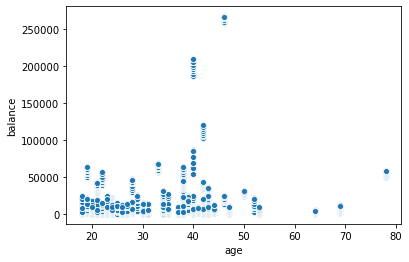

In [48]:
sns.scatterplot(x='age', y='balance', data=df)

In [49]:
pred_sal = df[df['txn_description'] == 'PAY/SALARY']
pred_sal.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,annual_salary
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,3903
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,1626
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,983
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,1408
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,1068


In [50]:
print("Unique features in Country Attirbute: ", df['country'].unique())
print("Unique features in Movement Attribute: ", pred_sal['movement'].unique())

Unique features in Country Attirbute:  ['Australia']
Unique features in Movement Attribute:  ['credit']


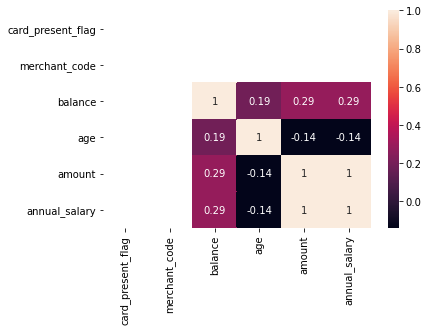

In [51]:
sns.heatmap(pred_sal.corr(), annot=True)

- card_present_flag & merchant_code are irrelevent columns

In [52]:
df_pred = pred_sal[['gender', 'age', 'balance', 'amount', 'annual_salary']]
df_pred.head()

,gender,age,balance,amount,annual_salary
50,M,23,8342.11,3903.95,3903
61,F,23,2040.58,1626.48,1626
64,M,22,3158.51,983.36,983
68,M,24,2517.66,1408.08,1408
70,F,43,2271.79,1068.04,1068


In [53]:
df_pred = pd.get_dummies(df_pred, drop_first=True)
df_pred.head()

,age,balance,amount,annual_salary,gender_M
50,23,8342.11,3903.95,3903,1
61,23,2040.58,1626.48,1626,0
64,22,3158.51,983.36,983,1
68,24,2517.66,1408.08,1408,1
70,43,2271.79,1068.04,1068,0


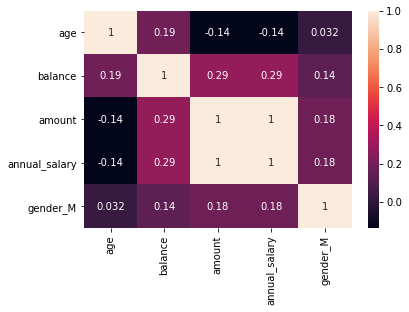

In [54]:
sns.heatmap(df_pred.corr(), annot=True)

### Split the data into X and y 

In [55]:
X = df_pred.drop('annual_salary', axis = 1)
y = df_pred['annual_salary']

In [56]:
X.head()

,age,balance,amount,gender_M
50,23,8342.11,3903.95,1
61,23,2040.58,1626.48,0
64,22,3158.51,983.36,1
68,24,2517.66,1408.08,1
70,43,2271.79,1068.04,0


In [57]:
y.head()

50    3903
61    1626
64     983
68    1408
70    1068
Name: annual_salary, dtype: int64

### Split the data into training and test set 

In [58]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3, random_state=0)

<h2 align='center'> Linear Regression </h2>

In [59]:
from sklearn.linear_model import LinearRegression

# Train the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train , y_train)

# Making predictions on Testset
y_pred_lin = lin_reg.predict(X_test)

# Model Score (r2_score value):
lin_reg.score(X_test , y_test)

0.9999999397336777

<h2 align='center'> Decision Tree </h2>

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt = DecisionTreeRegressor()

# Fit the model 
dt.fit(X_train , y_train)

#  Make predictions on testset
y_pred_dt = dt.predict(X_test)

# Model Score (r2_score value): 
dt.score(X_test , y_test)

0.9998231593248844